<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [2]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------


$$ A = 4\pi \int_{0}^{{2\pi}} \int_{0}^{\pi} {\sqrt{\beta^2c^2 \cos^2 \phi \sin^4 \theta + \beta^2c^2 \sin^2 \phi \sin^4 \theta + \beta^4 \cos^4 \phi \cos^2\theta \sin^2\theta + \beta^4\cos^2\theta \sin^2\theta \sin^4\phi}} \, d\theta \, d\phi $$


-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


In [124]:
'''--------------------Write your code below this line------------------------------'''
def ellipsoid_surface_area(beta, c, n1=100, n2=100):
    def integrand(theta, phi):
        return np.sqrt(
            beta**2 * c**2 * np.cos(phi)**2 * np.sin(theta)**4 +
            beta**2 * np.sin(phi)**2 * np.sin(theta)**2 +
            c**2 * np.cos(phi)**2
        )
    theta_values = np.linspace(.001, np.pi / 2, n1)
    phi_values = np.linspace(
        np.arccos(-1 / ((beta**2) * np.sin(theta_values))),
        np.arccos(1 / ((beta**2) * np.sin(theta_values))),
        n2
    )
    print(phi_values)
    dt=theta_values[1]-theta_values[0]
    dp=phi_values[1]-phi_values[0]
    area=0
    
    for theta in theta_values:
        for phi in phi_values:
            area+= integrand(theta+dt/2,phi+dp/2)*dt*dp
c=1
beta=2
ellipsoid_surface_area(beta,c)
e=1-(beta**2)/(c**2)
A=2*np.pi*(beta**2)*(1+(c/e)*np.arcsin(e))

### didn't have enough time to figure this out
'''--------------------Write your code above this line------------------------------'''

/var/folders/gr/k6p8k2jd27s0_5wbw04x_bv00000gn/T/ipykernel_13143/1593656924.py:11: RuntimeWarning: invalid value encountered in arccos
  np.arccos(-1 / ((beta**2) * np.sin(theta_values))),
/var/folders/gr/k6p8k2jd27s0_5wbw04x_bv00000gn/T/ipykernel_13143/1593656924.py:12: RuntimeWarning: invalid value encountered in arccos
  np.arccos(1 / ((beta**2) * np.sin(theta_values))),


[[       nan        nan        nan ... 1.82360648 1.82350904 1.82347658]
 [       nan        nan        nan ... 1.8184992  1.81840374 1.81837193]
 [       nan        nan        nan ... 1.81339192 1.81329843 1.81326728]
 ...
 [       nan        nan        nan ... 1.32820073 1.32829422 1.32832537]
 [       nan        nan        nan ... 1.32309345 1.32318892 1.32322072]
 [       nan        nan        nan ... 1.31798618 1.31808361 1.31811607]]


/var/folders/gr/k6p8k2jd27s0_5wbw04x_bv00000gn/T/ipykernel_13143/1593656924.py:27: RuntimeWarning: invalid value encountered in arcsin
  A=2*np.pi*(beta**2)*(1+(c/e)*np.arcsin(e))


'--------------------Write your code above this line------------------------------'

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



5
5
129.16666666666666



'--------------------Write your code above this line------------------------------'

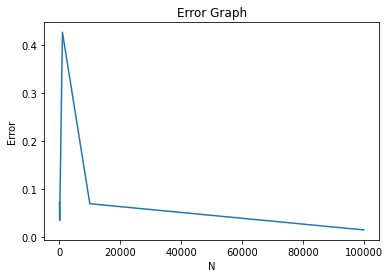

In [138]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
a = 1
b = 6
beta = 0.5  
samples= [10, 100, 1000, 10000, 100000]
errors=[]
def f(x):
    return x**2+3*x+1  

def monte(a, b, N):
    x_values = np.random.uniform(a, b, N)
    integral = (b - a) * np.mean(f(x_values)) ##this makes sense since 1/N of this summation is just the mean
    return integral

true_val = b**3/3+(3/2)*(b**2)+b -(a**3/3+(3/2)*(a**2)+a)
print(len(samples))
for sample in samples:
    integral = monte(a, b, N)
    error = np.abs(integral - true_val)
    errors.append(error)
#print(len(errors))
plt.plot(samples, errors)
plt.title('Error Graph')
plt.xlabel('N')
plt.ylabel('Error')
print(true_val)
#this makes sense as this is true for N approaching infinity hence larger N vals will be more accurate
'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



20
200
2000
20000
200000


'--------------------Write your code above this line------------------------------'

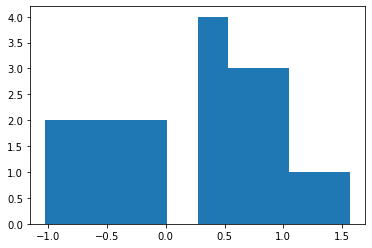

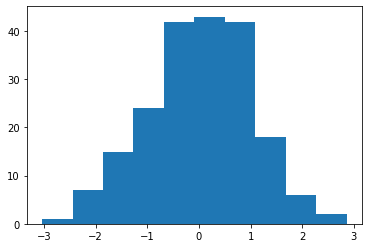

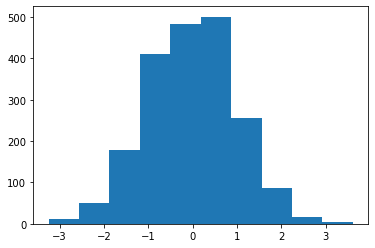

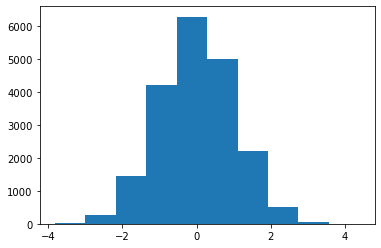

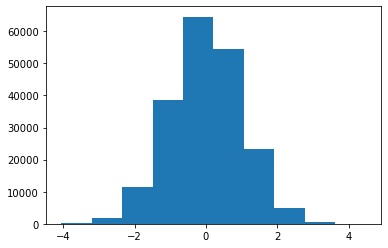

In [153]:
'''--------------------Write your code below this line------------------------------'''
#wasn't sure how to do this by solving the integral so I looked up the equivalent form in
#https://www.statisticshowto.com/box-muller-transform-simple-definition/
sample_sizes = [10,100,1000,10000,100000]
def gaussian_samples(mu,sigma,N):
    u1=np.random.uniform(0,1,N)
    u2=np.random.uniform(0,1,N)
    z0=np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z1=np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    z=np.concatenate((z0,z1)) #combine the vectors into one dataset
    data=mu+sigma*z
    print(len(z))
    plt.figure()
    plt.hist(data)
    
for N in sample_sizes:
    gaussian_samples(0,1,N)
'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





5
129.16666666666666


'--------------------Write your code above this line------------------------------'

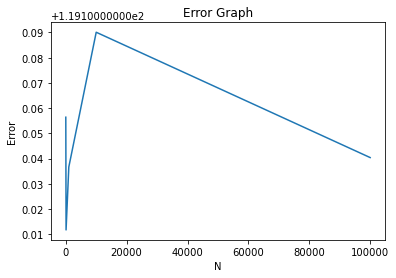

In [142]:
'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt
a = 1
b = 6
beta = 0.5  
mu=0
sigma=1
samples= [10, 100, 1000, 10000, 100000]
errors=[]
def f(x):
    return x**2+3*x+1  

def monte(a, b, N):
    x_values = np.random.normal(mu, sigma, N)
    integral = (b - a) * np.mean(f(x_values)) ##this makes sense since 1/N of this summation is just the mean
    return integral

true_val = b**3/3+(3/2)*(b**2)+b -(a**3/3+(3/2)*(a**2)+a)
print(len(samples))
for sample in samples:
    integral = monte(a, b, N)
    error = np.abs(integral - true_val)
    errors.append(error)
#print(len(errors))
plt.plot(samples, errors)
plt.title('Error Graph')
plt.xlabel('N')
plt.ylabel('Error')
print(true_val) #different because it takes more samples in order to start decreasing the error
#also the error is much larger than for the uniform samples
'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

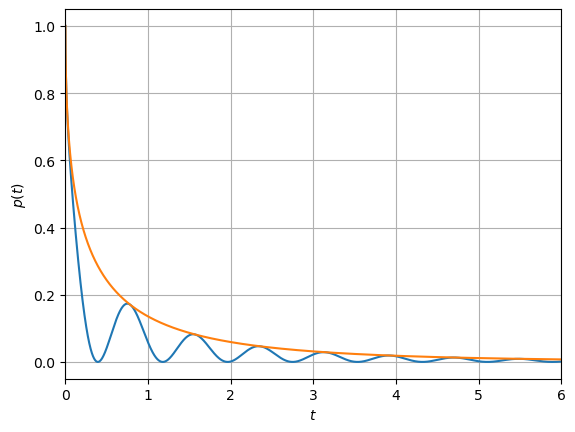

In [23]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



'--------------------Write your code above this line------------------------------'

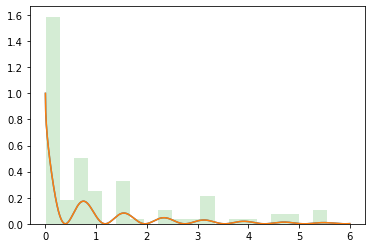

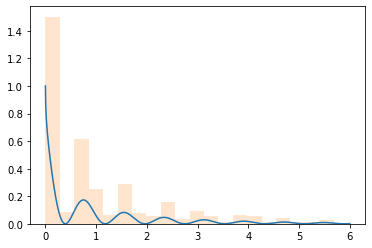

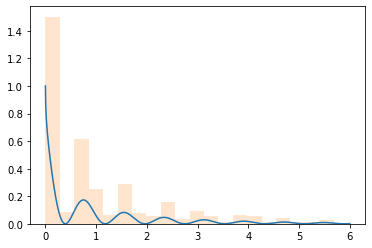

In [56]:
'''--------------------Write your code below this line------------------------------'''
import random
import scipy
from scipy import stats

def f(t):
    return np.exp(-2*np.sqrt(t))*np.cos(4*t)**2

ts = np.linspace(0, 6, 1000)
ys = f(ts)

plt.plot(ts, ys) 

def sample(function, xmin=0, xmax=6, ymax=1):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        y = np.random.uniform(low=0, high=ymax)
        if y < function(x):
            return x

samps1 = [sample(f) for i in range(100)]

plt.plot(ts, ys)
plt.hist(samps1,bins=20, density=True, alpha=0.2)

plt.figure()
samps2 = [sample(f) for i in range(1000)]

plt.plot(ts, ys)
plt.hist(samps2,bins=20, density=True, alpha=0.2)

plt.figure()
samps3 = [sample(f) for i in range(1000)]

plt.plot(ts, ys)
plt.hist(samps2,bins=20, density=True, alpha=0.2)

'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


0.05676800979072115


'--------------------Write your code above this line------------------------------'

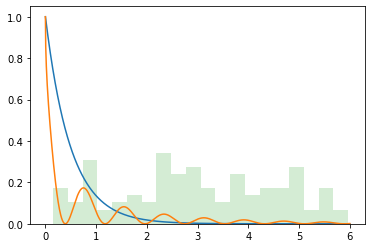

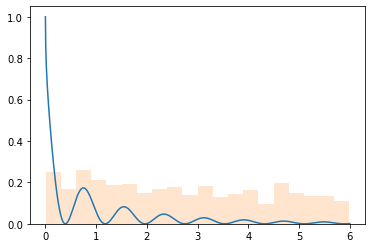

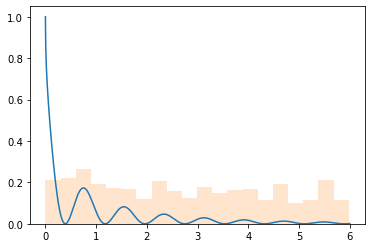

In [83]:
'''--------------------Write your code below this line------------------------------'''
#plt.plot(ts, ys, label="Function") 
plt.plot(ts,np.exp(-2*ts))
check=np.exp(-2*ts)
def sample(function, xmin=0, xmax=6, ymax=1):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        u = np.random.uniform(low=xmin, high=xmax)
        y = np.exp(-2*u)
        if y < function(x):
            return x
        
samps = [sample(f) for i in range(100)]

plt.plot(ts, ys, label="Function")
plt.hist(samps,bins=20, density=True, alpha=0.2, label="Sample distribution")
plt.figure()
samps2 = [sample(f) for i in range(1000)]

plt.plot(ts, ys, label="Function")
plt.hist(samps2,bins=20, density=True, alpha=0.2, label="Sample distribution")

plt.figure()
samps3 = [sample(f) for i in range(1000)]

plt.plot(ts, ys, label="Function")
plt.hist(samps3,bins=20, density=True, alpha=0.2, label="Sample distribution")


#why would this be accurate if this proposal function is mostly greater than the probability distribution
#if we make there be some tolerance it would be better
avdif=np.average(np.abs(check-ys))
print(avdif)
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

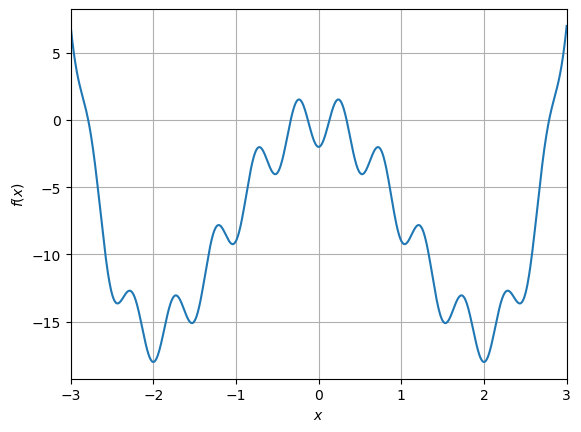

In [50]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

'--------------------Write your code above this line------------------------------'

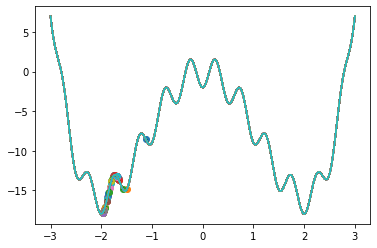

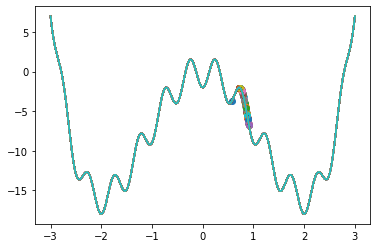

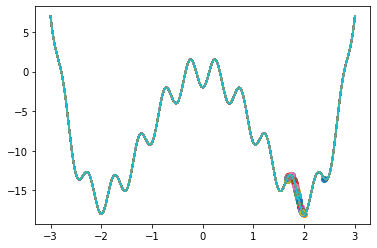

In [91]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
x=np.linspace(-3,3,1000)
y=x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
#plt.plot(x,y)
def gradient_descent(
    gradient, start, learn_rate, n_iter=100, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
        plt.scatter(vector,vector**4-8*vector**2 - 2*np.cos(4*np.pi*(vector)))
        plt.plot(x,y)
        #print(vector)
    return vector


gradient_descent(gradient=lambda x: 4*(x**3)-16*x - 8*np.pi*np.sin(4*np.pi*(x)), start=-1, learn_rate=0.01)
plt.figure()
gradient_descent(gradient=lambda x: 4*(x**3)-16*x - 8*np.pi*np.sin(4*np.pi*(x)), start=.5, learn_rate=0.01)
plt.figure()
gradient_descent(gradient=lambda x: 4*(x**3)-16*x - 8*np.pi*np.sin(4*np.pi*(x)), start=3, learn_rate=0.01)
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

In [113]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x**4 - 8*x**2 - 2*np.cos(4*np.pi*x)

def metropolis_hastings_optimization(guess, num_samples, beta,beta2):
    position = guess
    samples = [position] 

    for j in range(num_samples):
        proposal = np.random.normal(position, beta)

        # This institutes the r>1 r<1 condition
        acceptance_prob = min(1, np.exp(-beta2*f(proposal) + beta2*f(position))) #computes the r if it is greater than 1 it defaults to 100% probability

        # Accept or reject the proposal based on the criteria defined in problem
        if np.random.uniform(0, 1) < acceptance_prob:
            position = proposal
        else:
            position=position
        
        samples.append(position)

    return np.array(samples) #gives the array of samples we want


num_samples = 10000
beta = 0.5
beta2=1.6
# Initial guesses for optimization
initial_guesses = [-1, .5, 3.0]


for i, guesses in enumerate(initial_guesses):
    samples = metropolis_hastings_optimization(guesses, num_samples, beta,beta2)
    print(samples)
    
for i, guesses in enumerate(initial_guesses):
    samples = metropolis_hastings_optimization(guesses, num_samples, beta,2)
    print(samples)
    
for i, guesses in enumerate(initial_guesses):
    samples = metropolis_hastings_optimization(guesses, num_samples, beta,1)
    print(samples)
     
    

'''--------------------Write your code above this line------------------------------'''

[-1.         -1.         -1.13829024 ... -2.01217974 -2.01217974
 -2.01217974]
[0.5        1.06759357 1.06759357 ... 2.00877393 2.00877393 2.00877393]
[3.         3.         3.         ... 2.03343423 2.03343423 2.03343423]
[-1.         -1.         -1.         ... -2.00517609 -2.00517609
 -2.00517609]
[0.5       0.5       0.5       ... 2.0310934 2.0310934 2.0310934]
[3.         3.         2.48761431 ... 2.0631965  1.95638156 1.95638156]
[-1.         -1.         -1.         ... -2.01090233 -2.01090233
 -2.01090233]
[0.5        0.87557446 0.87557446 ... 1.97092121 1.97092121 1.97092121]
[3.         3.         3.         ... 1.90818046 1.90818046 1.90818046]


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

[-1.         -1.         -1.04648462 ... -2.00540743 -2.00540743
 -1.96075774]
[0.5        0.62199303 0.8047171  ... 2.05085418 2.10148837 2.10148837]
[3.         3.         3.         ... 2.05168044 2.05168044 2.05609327]
[-1.         -0.99376682 -0.99376682 ... -1.5425288  -1.92701436
 -1.92701436]
[ 0.5        -0.51441741 -0.56793377 ... -1.99150504 -1.99150504
 -2.00494446]
[3.         2.66416237 2.51299137 ... 1.96915048 1.96915048 1.96915048]
[-1.         -0.92823478 -1.09124883 ... -1.99345536 -1.99345536
 -1.99345536]
[0.5        0.49177333 0.59545121 ... 1.90013122 1.95814258 1.96923137]
[3.         3.         2.86429965 ... 1.97980517 1.97980517 1.97980517]
[1.0000e+00 2.0000e+00 3.0000e+00 ... 9.9990e+03 1.0000e+04 1.0001e+04]


'--------------------Write your code above this line------------------------------'

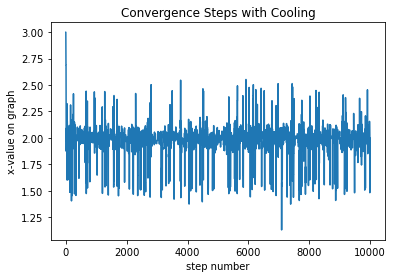

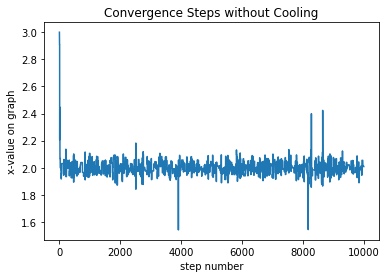

In [119]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x**4 - 8*x**2 - 2*np.cos(4*np.pi*x)

def metropolis_hastings_optimization2(guess, num_samples, beta,beta2,delta):
    position = guess
    samples = [position] 
    for j in range(num_samples):
        proposal = np.random.normal(position, beta)
        beta2=beta2+delta
        ui=np.random.uniform(0,1)
        # This institutes the r>1 r<1 condition
        if np.exp(-f(proposal) + f(position)) > ui:
            acceptance_prob = 1
        if np.exp(-f(proposal) + f(position)) < ui:
            acceptance_prob = np.exp(-beta2*f(proposal) + beta2*f(position))
        #acceptance_prob = min(1, np.exp(-f(proposal) + f(position))) #computes the r if it is greater than 1 it defaults to 100% probability
        
        # Accept or reject the proposal based on the criteria defined in problem
        if np.random.uniform(0, 1) < acceptance_prob:
            position = proposal
        else:
            position=position
        
        samples.append(position)

    return np.array(samples) #gives the array of samples we want

# Parameters
num_samples = 10000
beta = .5
beta2=1
delta=.5

initial_guesses = [-1, .5, 3.0]

# Run Metropolis–Hastings algorithm for each initial guess
for i, guesses in enumerate(initial_guesses):
    samples = metropolis_hastings_optimization2(guesses, num_samples, beta,beta2,delta)
    print(samples)


for i, guesses in enumerate(initial_guesses):
    samples = metropolis_hastings_optimization2(guesses, num_samples, beta,beta2,.5)
    print(samples)

    
for i, guesses in enumerate(initial_guesses):
    samples = metropolis_hastings_optimization2(guesses, num_samples, beta,beta2,1)
    print(samples)
    
plt.figure()
steps=np.linspace(1,num_samples+1,10001)
print(steps)
plt.plot(steps,samples)
plt.xlabel('step number')
plt.ylabel('x-value on graph')
plt.title('Convergence Steps with Cooling')

plt.figure()
for i, guesses in enumerate(initial_guesses):
    samples2 = metropolis_hastings_optimization(guesses, num_samples, beta,2)
    #print(samples)
plt.plot(steps,samples2)
plt.xlabel('step number')
plt.xlabel('step number')
plt.ylabel('x-value on graph')
plt.title('Convergence Steps without Cooling')

## I don't think that these graphs really make sense. I feel like cooling should
'''--------------------Write your code above this line------------------------------'''

In [ ]:
## we see that without cooling it quickly drops off, versus while cooling there is a slower, gradual dropoff.